# Teoría potencial linealizada 2D
La teoría potencial linealizada bidimensional se basa en la resolución de la ecuación de Laplace en dos dimensiones para un fluido incompresible y estacionario. En esta teoría, se asume que las fluctuaciones en la velocidad y la presión son pequeñas en comparación con las velocidades y presiones características del fluido. Frente a una resolución de las ecuaciones en cada punto del espacio discretizado, como podría ser a través del método de elementos o volúmenes finitos, a través del método de singularidades se calcula la velocidad en el campo fluido a través de la integración o sumatorio de la contribución de éstas, como se muestra en la figura inferior. Se emplean manantiales, sumideros, torbellinos, que pueden ser estar localizados de forma puntual, o extendidos en líneas o planos. Esta metodología es la que se utiliza habitualmente en la elaboración de los conocidos Métodos de Paneles o entramados de torbellinos (*Vortex Lattice*)

<p align="center">
  <img width="800" src=../../img/Grid_vs_Singularity_Drela.png>
<br><b>Método de malla discretizada frente a método de singularidades. <br>Imagen modificada de <i>"Flight Vehicle Aerodynamics"</i> (MIT Press, 2014)</b>
</p>

## Óvalo de Rankine
El óvalo de Rankine es un modelo matemático que representa un sistema de flujo en dos dimensiones. Se compone de dos singularidades, un manantial y un sumidero, alineados con la corriente incidente. La localización de los puntos de remanso y la forma del óvalo están determinados por la relación entre la intensidad de las singularidades y la corriente incidente, pudiendo estudiarse como una relación de gastos, como se ha visto en las clases de problemas. 

### Código Python para el cálculo del flujo potencial asociado a el óvalo de Rankine
En los siguientes párrafos se presenta una propuesta de cálculo numérico para el modelado discreto del flujo potencial. Existen muchas formas de realizar este cálculo, en este texto se presenta una alternativa sencilla que hace uso del módulo *NumPy* de Python, así como una representación gráfica de la función de corriente y el campo de velocidades.

Nótese que en lo que corresponde al texto escrito en este documento, se usan variables en **negrita** para denotar vectores o matrices.

Junto a este documento se dispone de códigos MatLab o Python para su ejecución independiente, así como del Notebook original. 

Del mismo modo, se puede ejecutar de forma online a través del siguiente enlace: [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/AMartinezCava/pyAero/HEAD?labpath=Notebook_RANKINE.ipynb)

In [32]:
# 1. Importación de módulos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [33]:
# 2. Definición de las funciones de cálculo del campo de velocidades
def velocity_field(x, z, Q, x_s, z_s):
    """
    Calcula el campo de velocidades inducido por una serie finita de manantiales y sumideros.
    
    Parámetros:
    x, z -- coordenadas en el plano xz
    Q -- magnitud de los manantiales/sumideros
    x_s, z_s -- coordenadas de los manantiales/sumideros
    
    Devuelve:
    u, w -- componentes del campo de velocidades
    """
    u = np.zeros_like(x, dtype='f8')
    w = np.zeros_like(z, dtype='f8')
    N = len(Q)
    for i in range(N):
        r = np.sqrt((x - x_s[i])**2 + (z - z_s[i])**2)
        u += Q[i] * (x - x_s[i]) / (2 * np.pi * r**2)
        w += Q[i] * (z - z_s[i]) / (2 * np.pi * r**2)
    return u, w

La función *velocity_field* toma como entrada las coordenadas **x** e **z** en el plano xz, la magnitud **Q** de los manantiales y sumideros, y las coordenadas **x_s**, **z_s** de los manantiales y sumideros. La función devuelve las componentes **u** y **w** del campo de velocidades.

Para calcular las componentes del campo de velocidades, se utiliza un ciclo for que recorre cada uno de los manantiales y sumideros y calcula la contribución de cada uno de ellos en las componentes **u** y **w** utilizando la formulación matemática correspondiente (que puede ser deducida analíticamente a partir de los contenidos teóricos de la asignatura). 

Por ejemplo, la formulación matemática utilizada aqui para calcular la velocidad horizontal inducida por un manantial de intensidad $Q$, que se encuentra localizado en $(x_Q, z_Q)$, en un punto del espacio, $p$, situado a una distancia radial $r$, es la siguiente:

$$ U = \frac{Q}{2\pi r}\cos{\theta} = \frac{Q}{2\pi r} \frac{(x_p-x_Q)}{r}$$

Podemos utilizar esta función para calcular el campo de velocidades en los distintos ejes del sistema de referencia empleado, tanto a nivel vectorial como a nivel puntual, y usar esos datos para visualizar la solución en un gráfico.

In [34]:
# Definimos la magnitud y ángulo de la velocidad incidente
U_inf = 2
alpha = 0

# Definimos las coordenadas de los manantiales y sumideros
Q = np.array([15, -15])
x_s = np.array([-5, 5])
z_s = np.array([0, 0])

# Se definen también sus coordenadas en el plano complejo, para el cálculo del potencial.
t_s = x_s + 1j*z_s
num_sources = len(Q)

# Definimos una malla para las coordenadas x e z
nx, nz = 40, 40
x = np.linspace(-10, 10, nx)
z = np.linspace(-10, 10, nz)
Xm, Zm = np.meshgrid(x, z)
Tm = Xm + 1j*Zm

# Calculamos las componentes u y v del campo de velocidades inducido por los manantiales o sumideros
u, w = velocity_field(Xm, Zm, Q, x_s, z_s)

# Añadimos el componente de la velocidad incidente
u += U_inf * np.cos(alpha*np.pi/180)
w += U_inf * np.sin(alpha*np.pi/180)

# Construimos la funcion potencial
pot = 0
for s in range(num_sources):
    pot += Q[s]*np.log(Tm - t_s[s]) / (2*np.pi)
pot += U_inf * np.exp(-1j*alpha*np.pi/180) * Tm

# De la función potencial extraemos tanto el potencial de velocidades (Phi) como la función de corriente (Psi)
phi = pot.real
psi = pot.imag

Una vez calculados el campo de velocidades, se calcula la función potencial de la forma habitual. Se recuerda que $f(t) = \Phi - i\Psi$, por lo que tras construir $f(t)$ es sencillo extraer tanto el potencial de velocidades, $\Phi$, como la función de corriente, $\Psi$.

Tras la fase de cálculo, es conveniente representar gráficamente la solución. Para ello hacemos uso de las funciones *contourf* y *contour* de Matplotlib, para representar el campo de la Función de Corriente ($\Psi$), y la línea de corriente correspondiente a $\Psi=0$.

Por último, empleamos la función *quiver* para representar el campo de velocidades vectorial de forma más visual. Por defecto, esta función representa la longitud de los vectores de forma inversa a su magnitud, por lo que aquí se realiza una normalización previa.
Aunque sabemos que $\dot{f}(t)= \Phi_x - i \Phi_z = U - iW$, disponemos del campo de velocidades calculado previamente, en las variables **u** y **w**.

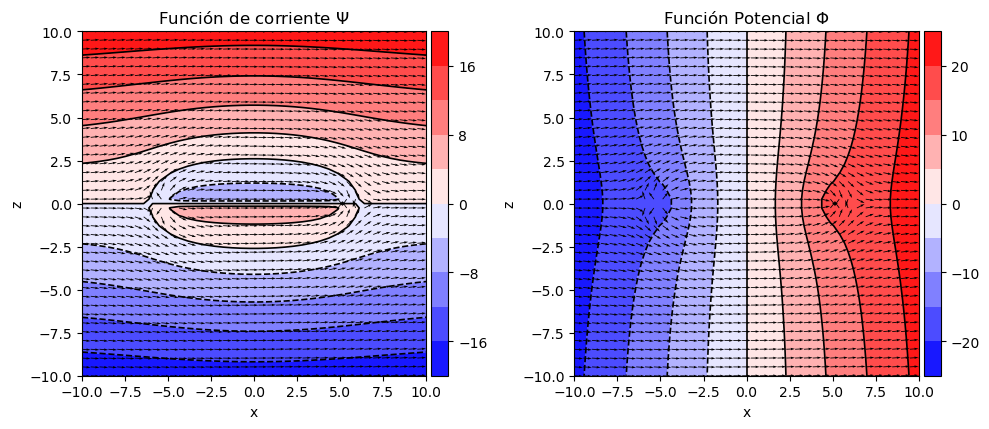

In [35]:
# Visualizamos la función de corriente y la función potencial
fig, axes = plt.subplots(1, 2, figsize=(10,8))                        # Creamos la figura
ax1, ax2 = axes.flatten()         

dividerPSI = make_axes_locatable(ax1)                                  # Ajustamos la posición de la barra de niveles
caxPSI = dividerPSI.append_axes('right', size='5%', pad=0.05)
cont = ax1.contourf(Xm, Zm, psi, 10, cmap='bwr')                       # Pintamos los contornos
ax1.contour(Xm, Zm, psi, levels=10, colors=['black'], linewidths=1.2) # Representamos la línea de corriente psi=0    
fig.colorbar(cont, cax=caxPSI, orientation='vertical')                 # Pintamos la barra de niveles
ax1.set_title(r'Función de corriente $\Psi$')

dividerPHI = make_axes_locatable(ax2)                                  # Ajustamos la posición de la barra de niveles
caxPHI = dividerPHI.append_axes('right', size='5%', pad=0.05)
cont = ax2.contourf(Xm, Zm, phi, 10, cmap='bwr')                       # Pintamos los contornos
ax2.contour(Xm, Zm, phi, levels=10, colors=['black'], linewidths=1.2) # Representamos la línea de corriente psi=0    
fig.colorbar(cont, cax=caxPHI, orientation='vertical')                 # Pintamos la barra de niveles
ax2.set_title(r'Función Potencial $\Phi$')

N = np.sqrt(u**2 + w**2)                                           
ax1.quiver(Xm, Zm, u/N, w/N, scale=40)                                 # Representamos el campo vectorial normalizado
ax2.quiver(Xm, Zm, u/N, w/N, scale=40)     

for ax in axes:
    ax.set_xlabel('x')                                                 # Etiquetamos de forma apropiada, y mostramos en pantalla
    ax.set_ylabel('z')
    ax.set_aspect('equal','box')
plt.tight_layout()

En este caso, la visualización vectorial (a través de la función *quiver*) puede confundir al observador, al parecer que hay vectores que "atraviesen la línea de corriente dibujada que conforma el óvalo. Téngase en cuenta que los vectores dibujados dependen de la discretización espacial utilizada, y su longitud está condicionada por el parámetro *scale* utilizado en la llamada a la función. La velocidad es **siempre** tangente a las líneas de corriente, y éstas **nunca** se pueden cruzar.

De forma similar al proceso antes realizado, podríamos representar el campo de velocidades tanto horizontal como vertical:

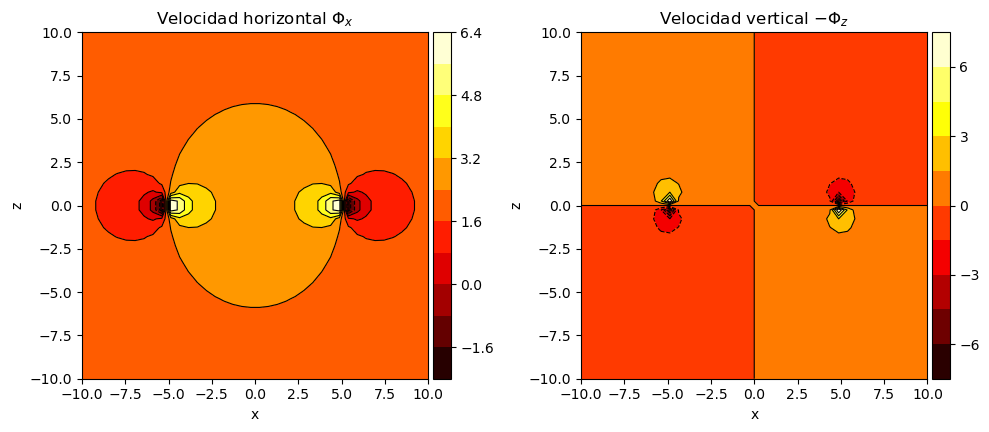

In [36]:
# Visualizamos el campo de velocidades y la función de corriente
fig, axes = plt.subplots(1,2, figsize=(10,8)) 
ax1, ax2 = axes.flatten()                                             # Creamos la figura, con dos plots integrados

dividerU = make_axes_locatable(ax1)                                   # Ajustamos la posición de la barra de niveles en U
caxU = dividerU.append_axes('right', size='5%', pad=0.05)
dividerV = make_axes_locatable(ax2)                                   # Ajustamos la posición de la barra de niveles en W
caxV = dividerV.append_axes('right', size='5%', pad=0.05)

ax1.set_title(r'Velocidad horizontal $\Phi_x$')
cont = ax1.contourf(Xm, Zm, u, 10, cmap='hot')                        # Pintamos los contornos de U
ax1.contour(Xm, Zm, u, levels=10, colors=['black'], linewidths=0.8)   # Representamos lineas de isocontornos
fig.colorbar(cont, cax=caxU, orientation='vertical')                  # Pintamos la barra de niveles

ax2.set_title(r'Velocidad vertical $-\Phi_z$')
cont = ax2.contourf(Xm, Zm, w, 10, cmap='hot')                        # Pintamos los contornos
ax2.contour(Xm, Zm, w, levels=10, colors=['black'], linewidths=0.8)   # Representamos la línea de corriente psi=0    
fig.colorbar(cont, cax=caxV, orientation='vertical')                  # Pintamos la barra de niveles


for ax in axes:
    ax.set_xlabel('x')                                                # Etiquetamos de forma apropiada, y mostramos en pantalla
    ax.set_ylabel('z')
    #ax.set(xlim=(-3, -1), ylim=(-1, 1))
    ax.set_aspect('equal','box')
plt.tight_layout()
plt.show()

### Cálculo de la velocidad generada por la distribución de singularidades en un punto discreto

Es habitual al emplearse métodos numéricos que pueden ligarse a una discretización espacial caer en el error de restringir nuestro análisis a ésta. Poniendo como recurso la Figura 1 de este documento, sería el considerar que todo cálculo va ir ligado a un "*grid method*", donde solo tendremos resultados en aquellos puntos definidos por nuestra malla (*grid*), o discretización espacial. Esto es cierto en las aproximaciones por elementos o volúmenes finitos, por ejemplo, donde en cada elemento de la malla se resuelven las ecuaciones diferenciales correspondientes al problema que estemos analizando, obteniéndose valores particulares para el nodo o la celda. Estos valores nodales pueden interpolarse para generar mapas de contorno para visualizar la solución:

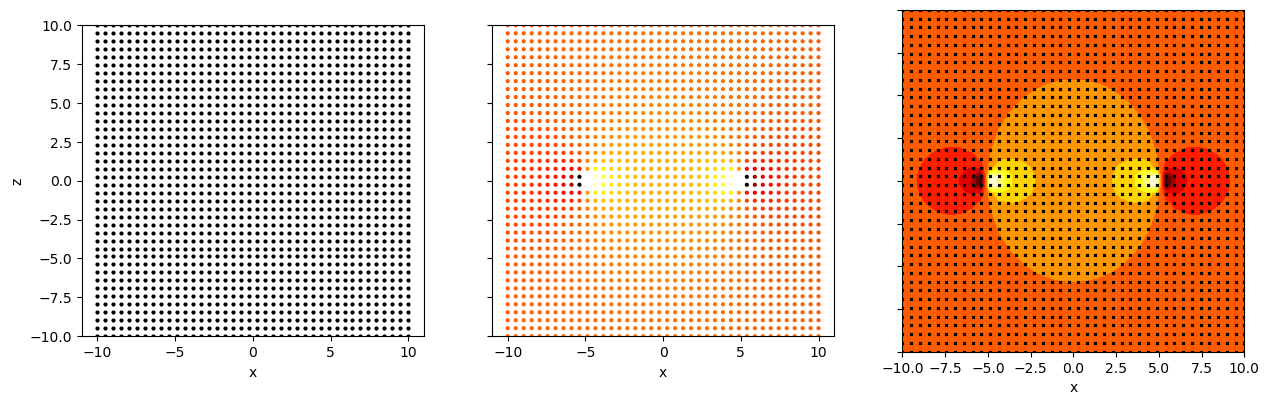

In [37]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,8))
ax1, ax2, ax3 = axes.flatten()

ax1.scatter(Xm, Zm, s=4, c='k')
ax1.set_ylabel('z')
ax2.scatter(Xm, Zm, s=4, c=u, cmap='hot')
ax3.plot(Xm, Zm, 'kx', markersize=2)
ax3.contourf(Xm, Zm, u, 10, cmap='hot')  

for ax in axes:
    ax.set_aspect('equal','box')
    ax.set_xlabel('x')
#plt.tight_layout()

Sin embargo, el metodo de las singularidades responde a la imagen derecha de la Figura 1, ofreciendo mucha más versatilidad **independiente** de una posible discretización espacial.
La función *velocity_field* definida en este Notebook permite el cálculo de la velocidad **en cualquier punto del espacio**, dada una distribución de singularidades. El uso de una discretización espacial (definida mediante las variables *nx* y *nz*) se usa aquí solamente para la representación gráfica de la solución, como se ha comentado previamente.

Visualicemos, como ejemplo, los puntos de la malla equiespaciada (círculos negros) definida sobre una distribución de velocidades, para distinto número de elementos en cada dirección, además del punto en el cual queremos conocer la velocidad (círculo verde):

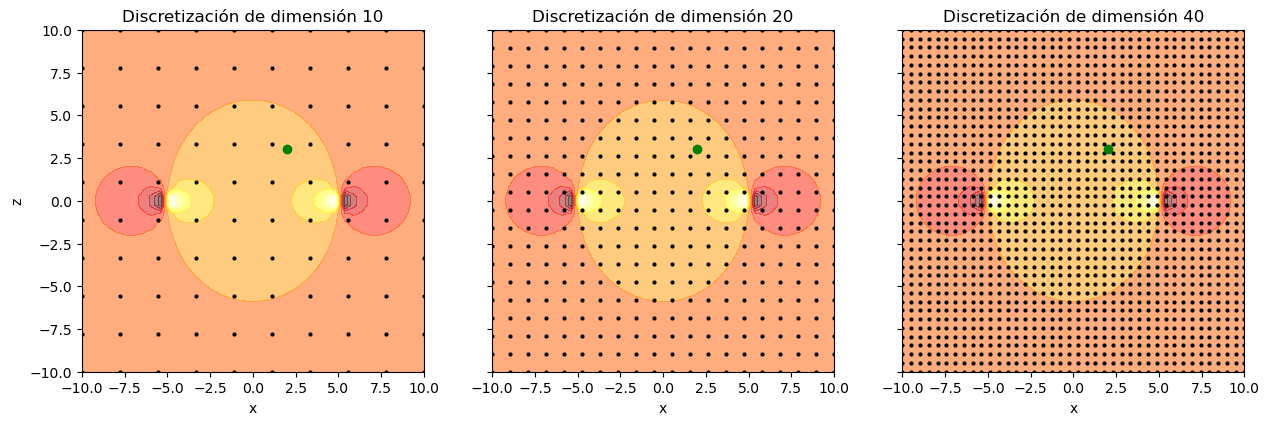

In [38]:
# Definimos el punto donde queremos calcular la velocidad
xp, zp = 2, 3

# Definimos el número de elementos de las discretizaciones a realizar
n_set = [10,20,40]
# Generamos una figura que contenga 3 subfiguras, en una fila y 3 columnas, que compartan la etiqueta del eje vertical
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,8))
axes[0].set_ylabel('z')
# Iteramos a la vez la lista n_set y los 3 objetos de las subfiguras
for nn, ax in zip(n_set, axes):
    xg = np.linspace(-10, 10, nn)
    zg = np.linspace(-10, 10, nn)
    Xmg, Zmg = np.meshgrid(xg, zg)
    ax.plot(Xmg, Zmg, 'ko', markersize=2)
    ax.contourf(Xm, Zm, u, levels=10, cmap='hot', alpha=0.5)
    ax.set_aspect('equal','box')
    ax.set_xlabel('x')
    ax.set_title('Discretización de dimensión '+str(nn))

# Pintamos en todas las figuras el punto donde queremos calcular la velocidad (sacado del bucle superior por claridad)
for ax in axes:
    ax.plot(xp, zp, 'go')


Puede ser "intuitivo" acudir a la discretización espacial para recuperar, por ejemplo la distribución de la velocidad horizontal mostrada en los gráficos. Para ello, uno debería acceder a la información contenida en la matriz *u*, teniendo en cuenta la localización espacial de cada uno de los modos (atención al especial detalle de MatLab y Python de tratar la coordenada Z en las filas y la X en las columnas). En ese caso, uno podría ver qué indice de *Xmg* y *Zmg* corresponde a coordenadas similares al punto (*xp,zp*), e intentar recuperar el valor de *u* indexando filas y columnas (*u[índice_z, índice_u]*).

Sin embargo, como se puede observar en los gráficos mostrados arriba, a menos que la discretización espacial sea muy fina (o tengamos mucha suerte con la distribución de los nodos), acudir a la información contenida en los nodos puede dar lugar a error, ya que estaremos cometiendo un error espacial a menos que nos dediquemos a interpolar entre nodos. Este error se podrá hacer más pequeño si aumentamos enormemente la discretización, aunque es evidente que no es una técnica muy eficiente.

Aquí es donde el método de las singularidades cobra fuerza, gracias a su definición. Al tratarse de soluciones lineales, estas **pueden superponerse**, y por tanto **sumar las contribuciones** de cada una de las singularidades en un punto dado del espacio. Esto es precisamente lo que realiza la función *velocity_field*.

A través de la sección de código:
~~~
N = len(Q)
    for i in range(N):
        r = np.sqrt((x - x_s[i])**2 + (z - z_s[i])**2)
        u += Q[i] * (x - x_s[i]) / (2 * np.pi * r**2)
        w += Q[i] * (z - z_s[i]) / (2 * np.pi * r**2)
    return u, w
~~~
sumamos las contribuciones de los distintos manantiales, calculando directamente la distancia del punto de interés a la singularidad.

Veámoslo de forma detallada en la siguiente sección de código. Nótese que en todo el cálculo que resta no se hace uso en absoluto de la discretización espacial (solo necesaria para la representación gráfica de la velocidad horizontal, pero no usada de nuevo en ningún momento).

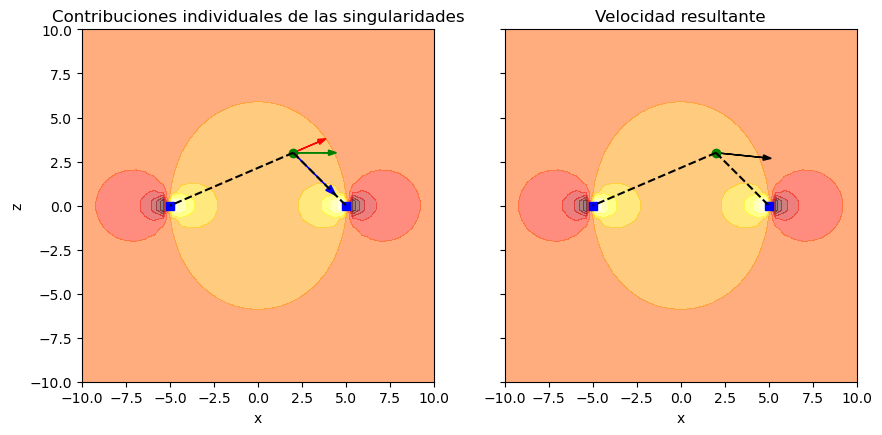

In [39]:
# Generamos dos figura y pintamos en ambas el contorno de velocidades, la localización de las singularidades (cuadrados azules) y el punto de interes (círculo verde)
fig, axes = plt.subplots(1,2, sharey=True, figsize=(10,5))
ax1, ax2 = axes.flatten()
ax1.set_ylabel('z')

for ax in axes:
    ax.contourf(Xm, Zm, u, levels=10, cmap='hot', alpha=0.5)
    ax.plot(xp, zp, 'go')
    ax.set_xlabel('x')
    for s in range(num_sources):
        ax.plot(x_s[s], z_s[s], 'sb')
        ax.plot([xp, x_s[s]], [zp, z_s[s]], 'k--')
        ax.set_aspect('equal','box')

## PRIMERA FIGURA ##
ax1.set_title('Contribuciones individuales de las singularidades')
# Pintamos la contribución del manantial (situado a la izquierda), como una flecha roja
scale = 5
um, wm = velocity_field(xp, zp, [Q[0]], [x_s[0]], [z_s[0]])
ax1.arrow(xp, zp, um*scale, wm*scale, head_width=0.3, color='red')

# Pintamos la contribución del sumidero (situado a la derecha), como una flecha azul
scale = 5
us, ws = velocity_field(xp, zp, [Q[1]], [x_s[1]], [z_s[1]])
ax1.arrow(xp, zp, us*scale, ws*scale, head_width=0.4, color='blue')

# Pintamos la contribución de la corriente incidente, como una flecha verde
ax1.arrow(xp, zp, U_inf, 0, head_width=0.3, color='green')

## SEGUNDA FIGURA ##
ax2.set_title('Velocidad resultante')
# Calculamos la velocidad resultante generada por ambas distribuciones y la corriente incidente, como una flecha negra
ut, wt = velocity_field(xp, zp, Q, x_s, z_s)
ut += U_inf
ax2.arrow(xp, zp, ut, wt, head_width=0.3, color='black')



La representación del vector velocidad de la figura derecha es la suma vectorial (de forma **lineal**) de los tres vectores mostrados en la figura izquierda, cada uno contribución individual al campo de velocidades total.

Es evidente que, de cara al cálculo de las velocidades en un punto dado, no tenemos que calcular de forma independiente cada una de las contribuciones. Basta con llamar una sola vez a la función *velocity_field*, como se hace en el segmento final del código arriba propuesto, otorgando las coordenadas de entrada y salida correspondientes. Téngase en cuenta que la función ahora mismo está diseñada para sumar las contribuciones de una distribución finita de manantiales, por ello se debe sumar la velocidad incidente en un paso adicional. Si se quisiese tener en cuenta otras singularidades, bastaría con modificar la función, o generar una nueva función y sumar linealmente las contribuciones.

### Cálculo de la velocidad y la presión en un punto dado

Visto el potencial de la función *velocity_field*, podemos en este caso obtener las velocidades horizontal y vertical **en cualquier punto del espacio**, así como la presión estática conocida una presión de referencia.
Para el cálculo de estas variables en el punto $(x_p,z_p)=(2,3)$ haríamos uso del procedimiento antes mencionado, así como de la Ecuación de Bernoulli, al tratarse de un flujo ideal, estacionario e incompresible:

$$p = p_{\infty} + \frac{\rho}{2}(U_{\infty}-u^2)$$

In [40]:
# Obtenemos las velocidades en el punto deseado
xp, zp = 2, 3
up, wp = velocity_field(xp, zp, Q, x_s, z_s)
up += U_inf

p_inf = 1e5
rho = 1.0
p = p_inf + 0.5*rho*(U_inf-up)

print('La velocidad, en m/s en el punto (x, z)=({0:3.1f}, {1:3.1f}) es (u, w)=({2:6.4f}, {3:6.4f})'.format(xp, zp, up, wp))
print('La presión estática en el punto (x, z)=({0:3.1f}, {1:3.1f}) es p={2:4.2f} Pa'.format(xp, zp, p))


La velocidad, en m/s en el punto (x, z)=(2.0, 3.0) es (u, w)=(2.6860, -0.2744)
La presión estática en el punto (x, z)=(2.0, 3.0) es p=99999.66 Pa
